# Advertising

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('C:/Users/Smile/OneDrive/Documents/Python Scripts/ML practice/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.shape

(200, 4)

In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

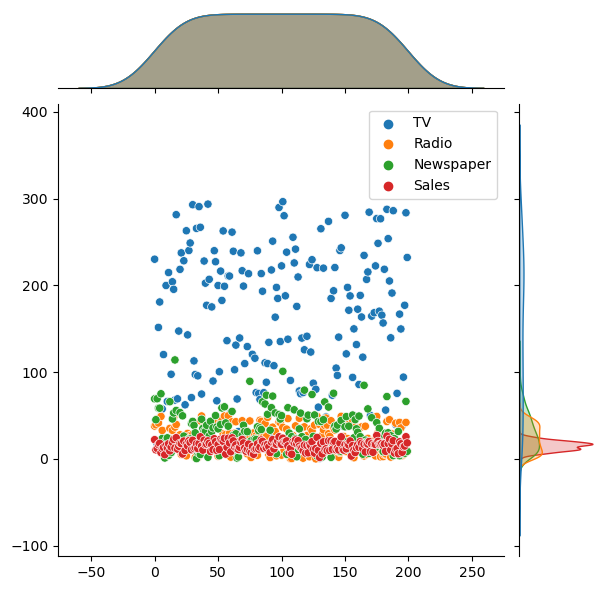

In [9]:
#EDA
sns.jointplot(data)

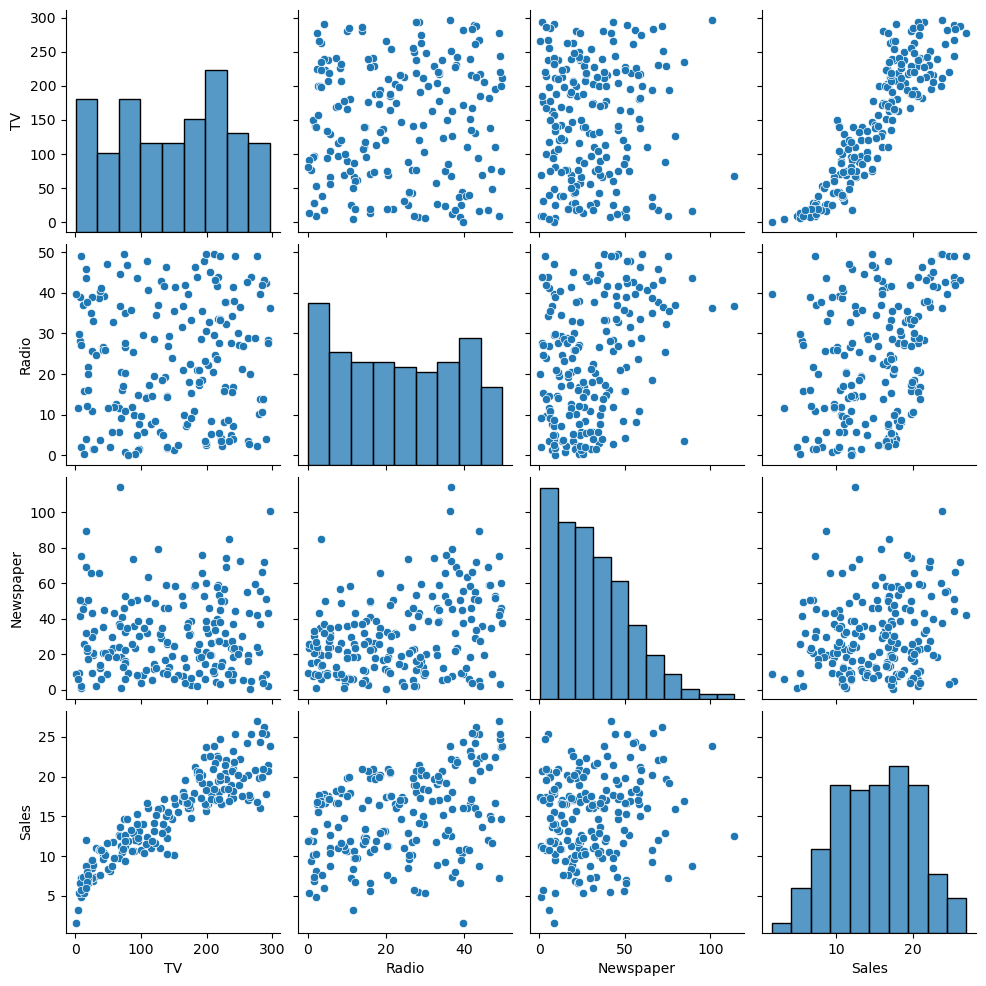

In [10]:
sns.pairplot(data)

<Axes: >

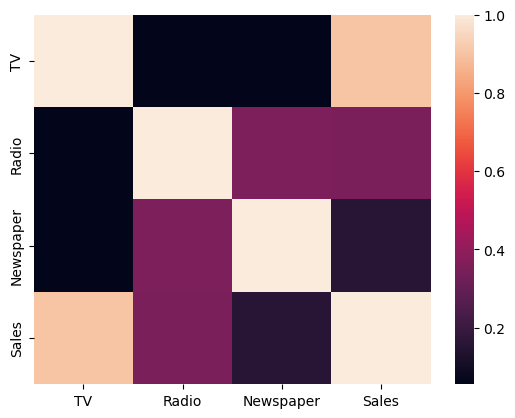

In [11]:
sns.heatmap(data.corr())

<Axes: xlabel='Sales', ylabel='Density'>

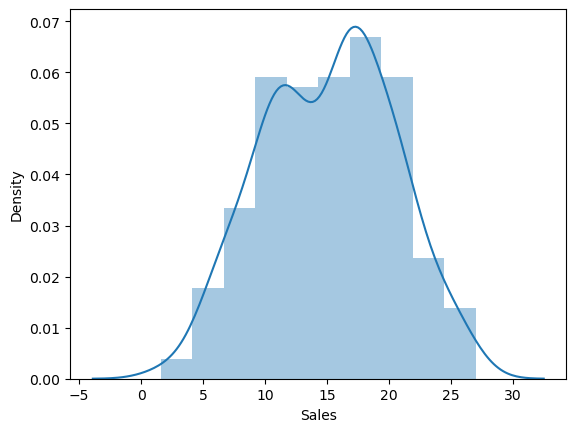

In [12]:
sns.distplot(data['Sales'])

In [13]:
X=data.iloc[:,:4]
Y=data['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

In [15]:
X_train.shape

(150, 4)

In [16]:
X_test.shape

(50, 4)

In [17]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [18]:
Y_predict=lm.predict(X_test)


In [20]:
df=pd.DataFrame({'Actual':Y_test,
                'predict':Y_predict})
df.tail()

,Actual,predict
18,11.3,11.3
78,5.3,5.3
48,19.8,19.8
4,17.9,17.9
15,22.4,22.4


In [22]:
df1=pd.DataFrame(lm.coef_,X.columns,columns=['coefficient'])
df1

,coefficient
TV,-6.807024e-17
Radio,-3.330669e-16
Newspaper,1.110223e-16
Sales,1.000000e+00


In [23]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(Y_test,Y_predict))
print('MAE:',metrics.mean_absolute_error(Y_test,Y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

MSE: 1.519346103455669e-29
MAE: 3.0730973321624333e-15
RMSE: 3.897879043089548e-15


In [24]:
r2_predict_Y=sum((Y_test-Y_predict)**2)
r2_predict_mean=sum((Y_test-Y_test.mean())**2)
r2=1-r2_predict_Y/r2_predict_mean
r2

1.0

In [25]:
from sklearn.metrics import r2_score
print("R2_score:",metrics.r2_score(Y_test,Y_predict))
R2_score=metrics.r2_score(Y_test,Y_predict)

R2_score: 1.0


In [26]:
r2==R2_score

True